In [187]:
import pandas as pd
import numpy as np

In [188]:
data = pd.read_csv('austin_traffic.csv')
weather_data = pd.read_csv('weather_72254.csv')

Code	Meaning
- TEMP : Air Temperature
- TAVG : Average Temperature
- TMIN : Minimum Temperature
- TMAX : Maximum Temperature
- DWPT : Dew Point
- PRCP : Total Precipitation
- WDIR : Wind (From) Direction
- WSPD : Average Wind Speed
- WPGT : Wind Peak Gust
- RHUM : Relative Humidity
- PRES : Sea-Level Air Pressure
- SNOW : Snow Depth
- TSUN : Total Sunshine Duration
- COCO : Weather Condition Code

In [189]:
data.head()

,Intersection Name,Month,Day,Year,Hour,Day of Week,Holiday,Direction,Speed,Volume,Full Date
0,BURNETPALM WAY,9,7,2021,23,2,0,NB,42,181,9/7/21 23:00
1,BURNETPALM WAY,9,7,2021,23,2,0,SB,44,112,9/7/21 23:00
2,LAMARCOLLIER,9,7,2021,23,2,0,NB,36,215,9/7/21 23:00
3,LAMARCOLLIER,9,7,2021,23,2,0,SB,39,305,9/7/21 23:00
4,LAMARMANCHACA,9,7,2021,23,2,0,NB,32,174,9/7/21 23:00


In [190]:
weather_data.head()

,date,tavg,tmin,tmax,prcp,snow,wspd,pres
0,6/18/17,30.6,25.6,37.8,0.0,0,11.5,1006.9
1,6/19/17,27.8,24.4,33.3,0.3,0,6.1,1012.2
2,6/20/17,29.9,24.4,36.7,0.0,0,8.3,1013.1
3,6/21/17,29.9,23.9,36.1,0.0,0,9.4,1009.0
4,6/22/17,30.1,24.4,37.2,0.0,0,7.9,1004.5


In [191]:
# print the range of dates in the dataset
print(data['Full Date'].min())
print(data['Full Date'].max())

1/1/18 0:00
9/9/20 9:00


In [192]:
# mrge weather data into traffic data
data['date'] = pd.to_datetime(data['Full Date']).dt.strftime('%-m/%-d/%y')

# print date in data frame
data.head() 


/var/folders/3k/8wtd1nfx1bz0fg5qcr45t3yw0000gn/T/ipykernel_38518/324628732.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['Full Date']).dt.strftime('%-m/%-d/%y')


,Intersection Name,Month,Day,Year,Hour,Day of Week,Holiday,Direction,Speed,Volume,Full Date,date
0,BURNETPALM WAY,9,7,2021,23,2,0,NB,42,181,9/7/21 23:00,9/7/21
1,BURNETPALM WAY,9,7,2021,23,2,0,SB,44,112,9/7/21 23:00,9/7/21
2,LAMARCOLLIER,9,7,2021,23,2,0,NB,36,215,9/7/21 23:00,9/7/21
3,LAMARCOLLIER,9,7,2021,23,2,0,SB,39,305,9/7/21 23:00,9/7/21
4,LAMARMANCHACA,9,7,2021,23,2,0,NB,32,174,9/7/21 23:00,9/7/21


In [193]:
weather_data['date'] = pd.to_datetime(weather_data['date']).dt.strftime('%-m/%-d/%y') 
weather_data.head()

/var/folders/3k/8wtd1nfx1bz0fg5qcr45t3yw0000gn/T/ipykernel_38518/1778860546.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather_data['date'] = pd.to_datetime(weather_data['date']).dt.strftime('%-m/%-d/%y')


,date,tavg,tmin,tmax,prcp,snow,wspd,pres
0,6/18/17,30.6,25.6,37.8,0.0,0,11.5,1006.9
1,6/19/17,27.8,24.4,33.3,0.3,0,6.1,1012.2
2,6/20/17,29.9,24.4,36.7,0.0,0,8.3,1013.1
3,6/21/17,29.9,23.9,36.1,0.0,0,9.4,1009.0
4,6/22/17,30.1,24.4,37.2,0.0,0,7.9,1004.5


In [194]:
merged_data = data.merge(weather_data, on='date', how='left')
merged_data.head()

,Intersection Name,Month,Day,Year,Hour,Day of Week,Holiday,Direction,Speed,Volume,Full Date,date,tavg,tmin,tmax,prcp,snow,wspd,pres
0,BURNETPALM WAY,9,7,2021,23,2,0,NB,42,181,9/7/21 23:00,9/7/21,28.4,22.2,36.1,0.0,0,2.5,1012.4
1,BURNETPALM WAY,9,7,2021,23,2,0,SB,44,112,9/7/21 23:00,9/7/21,28.4,22.2,36.1,0.0,0,2.5,1012.4
2,LAMARCOLLIER,9,7,2021,23,2,0,NB,36,215,9/7/21 23:00,9/7/21,28.4,22.2,36.1,0.0,0,2.5,1012.4
3,LAMARCOLLIER,9,7,2021,23,2,0,SB,39,305,9/7/21 23:00,9/7/21,28.4,22.2,36.1,0.0,0,2.5,1012.4
4,LAMARMANCHACA,9,7,2021,23,2,0,NB,32,174,9/7/21 23:00,9/7/21,28.4,22.2,36.1,0.0,0,2.5,1012.4


In [195]:
# export merged data to csv
#merged_data.to_csv('traffic_weather.csv', index=False)

In [196]:
# get null values
merged_data.isnull().sum()

Intersection Name        0
Month                    0
Day                      0
Year                     0
Hour                     0
Day of Week              0
Holiday                  0
Direction                0
Speed                    0
Volume                   0
Full Date                0
date                     0
tavg                  1152
tmin                     0
tmax                     0
prcp                     0
snow                     0
wspd                     0
pres                 10712
dtype: int64

In [197]:
len(merged_data)

567532

In [198]:
# drop the tsun column and wpgt column
merged_data.drop(['pres'], axis=1, inplace=True)

In [199]:
merged_data.isnull().sum()

Intersection Name       0
Month                   0
Day                     0
Year                    0
Hour                    0
Day of Week             0
Holiday                 0
Direction               0
Speed                   0
Volume                  0
Full Date               0
date                    0
tavg                 1152
tmin                    0
tmax                    0
prcp                    0
snow                    0
wspd                    0
dtype: int64

In [200]:
len(merged_data)

567532

In [201]:
data = merged_data.dropna()

In [202]:
data.isnull().sum()

Intersection Name    0
Month                0
Day                  0
Year                 0
Hour                 0
Day of Week          0
Holiday              0
Direction            0
Speed                0
Volume               0
Full Date            0
date                 0
tavg                 0
tmin                 0
tmax                 0
prcp                 0
snow                 0
wspd                 0
dtype: int64

In [203]:
len(data)

566380

In [204]:
# export merged data to csv
data.to_csv('traffic_weather.csv', index=False)

In [205]:
## RETIRED

# import numpy as np
# import pandas as pd

# # 
# data['Full Date'] = pd.to_datetime(data['Full Date'])  # date to date time

# # unique date-hour combinations 
# unique_date_hour = (
#     data.groupby(['Year', 'Month', 'Day', 'Hour'], as_index=False)
#     .agg({'Full Date': 'first', 'tmin': 'first', 'tmax': 'first'})
# )

# # Step 2: Perform hourly temperature interpolation using a sinusoidal function
# unique_date_hour['temperature'] = (
#     unique_date_hour['tmin'] +
#     (unique_date_hour['tmax'] - unique_date_hour['tmin']) *
#     np.sin(np.pi * (unique_date_hour['Hour'] - 6) / 24).clip(0, 1)  # Adjust hour to match typical temperature patterns
# )

# # Step 3: Merge interpolated temperature back to the original dataset
# data = pd.merge(
#     data,
#     unique_date_hour[['Year', 'Month', 'Day', 'Hour', 'temperature']],
#     on=['Year', 'Month', 'Day', 'Hour'],
#     how='left'
# )





In [206]:
import numpy as np
import pandas as pd

# inerpolate with sinousoidal function
def interpolate_temperature(row):
    hour = row['Hour']
    
    adjusted_hour = (hour - 6 + 24) % 24 
    
    temperature = row['tmin'] + (row['tmax'] - row['tmin']) * (
        np.sin(np.pi * (adjusted_hour - 3) / 12) + 1
    ) / 2
    
    return temperature

# unique date hour combos
unique_date_hour = (
    data.groupby(['Year', 'Month', 'Day', 'Hour'], as_index=False)
    .agg({
        'Full Date': 'first', 
        'tavg': 'first',
        'tmin': 'first', 
        'tmax': 'first'
    })
)

# apply interpolation
unique_date_hour['temperature'] = unique_date_hour.apply(interpolate_temperature, axis=1)

# mergr back to data
data = pd.merge(
    data,
    unique_date_hour[['Year', 'Month', 'Day', 'Hour', 'temperature']],
    on=['Year', 'Month', 'Day', 'Hour'],
    how='left'
)

## Interpolation Function Used

$$
T = T_\mathrm{min} + (T_\mathrm{max} - T_\mathrm{min}) \cdot \left(\frac{\sin\left(\pi \cdot \frac{(h - 3)}{12}\right) + 1}{2}\right)
$$

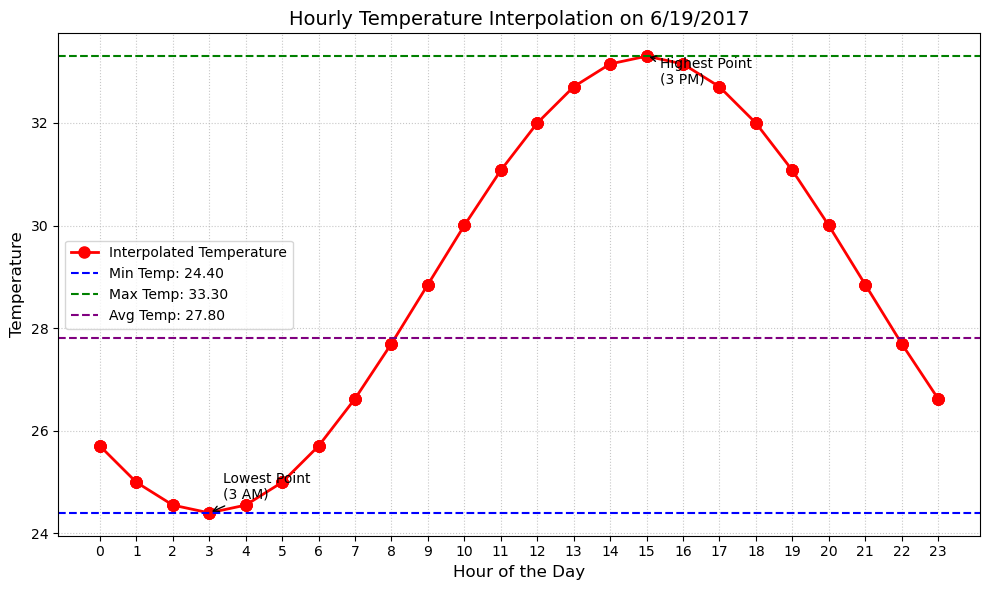

In [218]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# plot for 6/19/17
def plot_daily_temperatures(data):
    # get date
    daily_data = data[(data['Year'] == 2017) & 
                      (data['Month'] == 6) & 
                      (data['Day'] == 19)]
    

    daily_data = daily_data.sort_values('Hour')
    

    plt.figure(figsize=(10, 6))

    plt.plot(daily_data['Hour'], daily_data['temperature'], 
             marker='o', linestyle='-', linewidth=2, 
             markersize=8, color='red', 
             label='Interpolated Temperature')
    
    # reference points
    min_temp = daily_data['tmin'].iloc[0]
    max_temp = daily_data['tmax'].iloc[0]
    avg_temp = daily_data['tavg'].iloc[0]
    
    plt.axhline(y=min_temp, color='blue', linestyle='--', 
                label=f'Min Temp: {min_temp:.2f}')
    plt.axhline(y=max_temp, color='green', linestyle='--', 
                label=f'Max Temp: {max_temp:.2f}')
    plt.axhline(y=avg_temp, color='purple', linestyle='--', 
                label=f'Avg Temp: {avg_temp:.2f}')
    

    plt.title('Hourly Temperature Interpolation on 6/19/2017', fontsize=14)
    plt.xlabel('Hour of the Day', fontsize=12)
    plt.ylabel('Temperature', fontsize=12)
    plt.xticks(range(0, 24))
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.legend()
    
    # Annotate key points
    plt.annotate('Lowest Point\n(3 AM)', 
                 xy=(3, min_temp), 
                 xytext=(10, 10), 
                 textcoords='offset points',
                 arrowprops=dict(arrowstyle='->'))
    
    plt.annotate('Highest Point\n(3 PM)', 
                 xy=(15, max_temp), 
                 xytext=(10, -20), 
                 textcoords='offset points',
                 arrowprops=dict(arrowstyle='->'))
    
    plt.tight_layout()
    plt.show()

# Call the function
plot_daily_temperatures(data)

In [216]:
data.head()

,Intersection Name,Month,Day,Year,Hour,Day of Week,Holiday,Direction,Speed,Volume,Full Date,date,tavg,tmin,tmax,prcp,snow,wspd,temperature
0,BURNETPALM WAY,9,7,2021,23,2,0,NB,42,181,9/7/21 23:00,9/7/21,28.4,22.2,36.1,0.0,0,2.5,25.675
1,BURNETPALM WAY,9,7,2021,23,2,0,SB,44,112,9/7/21 23:00,9/7/21,28.4,22.2,36.1,0.0,0,2.5,25.675
2,LAMARCOLLIER,9,7,2021,23,2,0,NB,36,215,9/7/21 23:00,9/7/21,28.4,22.2,36.1,0.0,0,2.5,25.675
3,LAMARCOLLIER,9,7,2021,23,2,0,SB,39,305,9/7/21 23:00,9/7/21,28.4,22.2,36.1,0.0,0,2.5,25.675
4,LAMARMANCHACA,9,7,2021,23,2,0,NB,32,174,9/7/21 23:00,9/7/21,28.4,22.2,36.1,0.0,0,2.5,25.675


In [217]:
# export merged data to csv
data.to_csv('traffic_weather.csv', index=False)

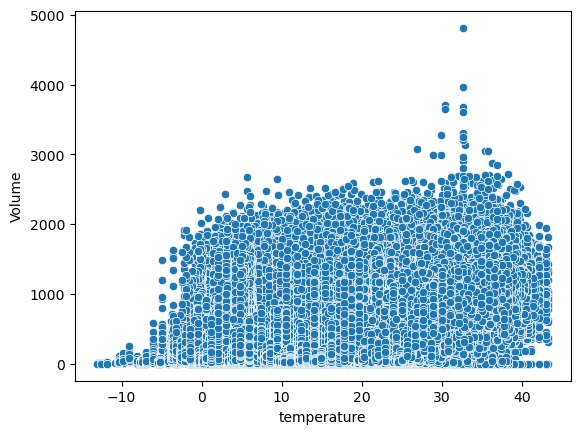

In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# scatter plot of temperature and volume
sns.scatterplot(x='temperature', y='Volume', data=data)
plt.show()


In [211]:
# print range of volume
print(data['Volume'].min())
print(data['Volume'].max())

# print average volume
print(data['Volume'].mean())

0
4813
597.2395458879198


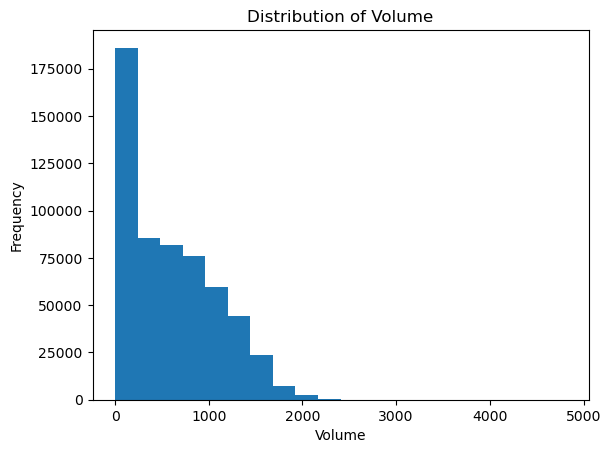

In [212]:
# plot distribution of volume
plt.hist(data['Volume'], bins=20)
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Volume')
plt.show()

In [213]:
# count number of 0s in volume column
print(data['Volume'].value_counts())

Volume
0       4139
36      1787
31      1750
41      1748
39      1742
        ... 
3249       1
3614       1
4813       1
2226       1
2579       1
Name: count, Length: 2443, dtype: int64
